# Gamma and log contrast adjustment
### Dr. Tirthajyoti Sarkar, Fremont CA 94536, June 2019

This notebook shows how to adjust image contrast by performing a **[Gamma](https://www.siggraph.org/education/materials/HyperGraph/color/gamma_correction/gamma_intro.html)** and a **[Logarithmic correction](https://homepages.inf.ed.ac.uk/rbf/HIPR2/pixlog.htm)** on the input image.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure

### Function to display an image along with its histogram and the cumulative distribution function (CDF)

In [2]:
def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r',lw=3)
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

### Load example image

In [3]:
# Load an example image
img = data.moon()

### Gamma corrected with $\gamma=2$

In [4]:
gamma_corrected = exposure.adjust_gamma(img, 2)

### Logarithmic correction

In [5]:
logarithmic_corrected = exposure.adjust_log(img, 1)

### Display results side by side

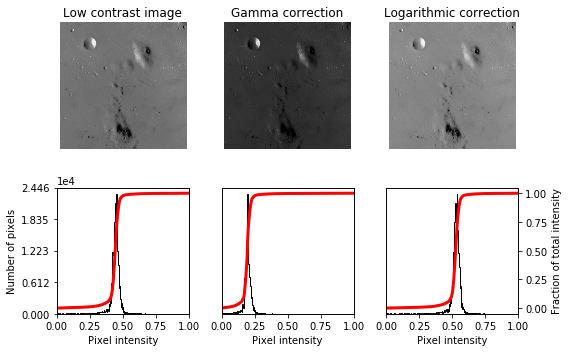

In [6]:
fig = plt.figure(figsize=(8, 5))

axes = np.zeros((2, 3), dtype=np.object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(gamma_corrected, axes[:, 1])
ax_img.set_title('Gamma correction')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(logarithmic_corrected, axes[:, 2])
ax_img.set_title('Logarithmic correction')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

### Progressive higher power (gamma) transformations

In [10]:
img = data.moon()
gamma_img=[]
for g in [0.5*i for i in range(1,5)]:
    gamma_img.append(exposure.adjust_gamma(img, g))

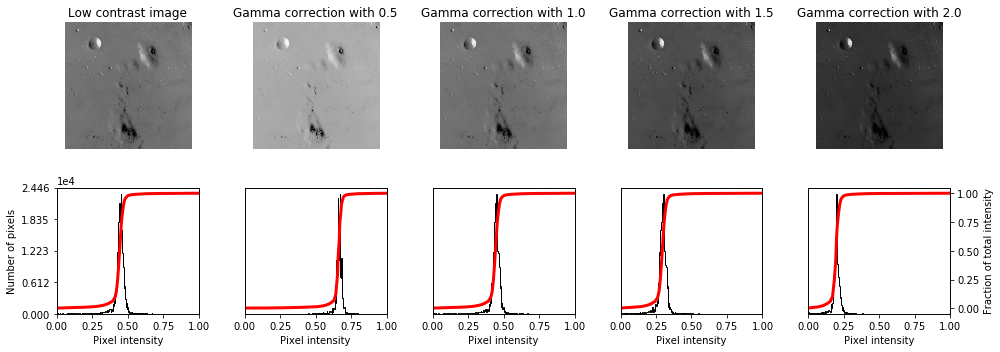

In [15]:
fig = plt.figure(figsize=(14, 5))

axes = np.zeros((2, 5), dtype=np.object)
axes[0, 0] = plt.subplot(2, 5, 1)
axes[0, 1] = plt.subplot(2, 5, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 5, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 3] = plt.subplot(2, 5, 4, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 4] = plt.subplot(2, 5, 5, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 5, 6)
axes[1, 1] = plt.subplot(2, 5, 7)
axes[1, 2] = plt.subplot(2, 5, 8)
axes[1, 3] = plt.subplot(2, 5, 9)
axes[1, 4] = plt.subplot(2, 5, 10)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

for i in range(1,5):
    ax_img, ax_hist, ax_cdf = plot_img_and_hist(gamma_img[i-1], axes[:, i])
    ax_img.set_title('Gamma correction with {}'.format(0.5*i))

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()